In [1]:
from pymongo import MongoClient
import pprint
import numpy as np
import scipy.stats as stats
import scipy

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('fivethirtyeight')

import requests

from bs4 import BeautifulSoup

import json
import time
import copy
from datetime import datetime

In [2]:
pokemon_df_complete = pd.read_csv('~/DSI_ii/cap_stones/DSI_CS2/data/pokemongo_new.csv')

In [3]:
pokemon_df_complete

,Unnamed: 0,title,score,id,subreddit,url,num_comments,body,created
0,0,What’s the meta right now for the premier league?,1,mfz6c6,pokemongo,https://www.reddit.com/r/pokemongo/comments/mf...,2,Just wondering what most people would consider...,2021-03-30 04:49:12
1,1,A gaze open him in disappointment,4,mfyy6y,pokemongo,https://i.redd.it/i2nuhrod31q61.jpg,8,NaN,2021-03-30 04:39:06
2,2,Niantic AR Glasses are coming soon!,2,mfyvpl,pokemongo,https://twitter.com/johnhanke/status/137662474...,0,NaN,2021-03-30 04:35:53
3,3,The Higher They Fly... research,3,mfytk6,pokemongo,https://www.reddit.com/r/pokemongo/comments/mf...,3,"My brother just finished defeating Giovanni, g...",2021-03-30 04:33:09
4,4,Can I get still get shadow mewtwo if i beat gi...,2,mfyqmj,pokemongo,https://www.reddit.com/r/pokemongo/comments/mf...,9,So i just complete an Inter-egg-sting developm...,2021-03-30 04:29:36
...,...,...,...,...,...,...,...,...,...
978,978,Raid issue,1,m7fsak,pokemongo,https://www.reddit.com/r/pokemongo/comments/m7...,2,Me and my friend were doing a raid and used ou...,2021-03-18 09:20:19
979,979,Referral Rewards,43,m7fn92,pokemongo,https://i.redd.it/73ahpz54ton61.jpg,24,NaN,2021-03-18 09:12:34
980,980,Only took me about 3 years! Just in time for m...,35,m7f7wz,pokemongo,https://www.reddit.com/r/pokemongo/comments/m7...,7,"I'm so happy to finally hit 40, I've been work...",2021-03-18 08:49:35
981,981,How to get multiple of the same task from the ...,0,m7f6he,pokemongo,https://www.reddit.com/r/pokemongo/comments/m7...,7,"So I’m out trying to get the Gible task, I got...",2021-03-18 08:47:25


In [4]:
pokemon_df = pokemon_df_complete[pokemon_df_complete.created <'2021-03-29 10:49:12']

In [5]:
pokemon_df.drop(pokemon_df.columns[0],axis=1)

,title,score,id,subreddit,url,num_comments,body,created
76,Kyogre.. what are you doing?,42,mffwsy,pokemongo,https://i.redd.it/jpgidk26qvp61.jpg,10,NaN,2021-03-29 10:36:08
77,How’s everyone’s shiny Mew quest going?,1,mfflil,pokemongo,https://www.reddit.com/r/pokemongo/comments/mf...,20,All I can say is I have never walked so much i...,2021-03-29 10:17:17
78,"Oh, nvm, there’s another one a block over!",303,mffjio,pokemongo,https://i.redd.it/0zhcza88mvp61.jpg,14,NaN,2021-03-29 10:14:03
79,Quick Rant,4,mffi4a,pokemongo,https://www.reddit.com/r/pokemongo/comments/mf...,3,Anyone else sick of reward pokemon (like for r...,2021-03-29 10:11:53
80,Not shiny rayquaza,3,mffb8v,pokemongo,https://www.reddit.com/r/pokemongo/comments/mf...,1,"It may not be a shiny rayquaza, nor are its iv...",2021-03-29 10:00:49
...,...,...,...,...,...,...,...,...
978,Raid issue,1,m7fsak,pokemongo,https://www.reddit.com/r/pokemongo/comments/m7...,2,Me and my friend were doing a raid and used ou...,2021-03-18 09:20:19
979,Referral Rewards,43,m7fn92,pokemongo,https://i.redd.it/73ahpz54ton61.jpg,24,NaN,2021-03-18 09:12:34
980,Only took me about 3 years! Just in time for m...,35,m7f7wz,pokemongo,https://www.reddit.com/r/pokemongo/comments/m7...,7,"I'm so happy to finally hit 40, I've been work...",2021-03-18 08:49:35
981,How to get multiple of the same task from the ...,0,m7f6he,pokemongo,https://www.reddit.com/r/pokemongo/comments/m7...,7,"So I’m out trying to get the Gible task, I got...",2021-03-18 08:47:25


In [6]:
pokemon_df['low_score'] = pokemon_df['score']<=1

/home/thomas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
from bs4 import BeautifulSoup

In [9]:
import unicodedata

def remove_accents(input_str:str) -> str:
    '''Removes accents from input string'''
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

def filter_tokens(tokens:list, stops:object) -> list:
    """Filters tokens base on membership in stop list"""
#     split_punc = lambda x: 
    res = []
    check = [".", "-"]
    for token in tokens:
        if token not in stops and token.isalpha():
            if check[0] in token:
                res += token.partition(check[0])
            elif check[1] in token:
                res += token.partition(check[1])
            else:
                res.append(token)
    return res

In [10]:
from collections import Counter
import re
import json
from pprint import pprint
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# NLTK Modules
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from src.cleaner import clean_data
from src.helpers import *

In [11]:
bnlp_df = pokemon_df['body']
bnlp_df = bnlp_df.fillna('')

In [12]:
import string
import unicodedata
from nltk.util import ngrams
from nltk import pos_tag
from nltk import RegexpParser

In [13]:
y = pokemon_df['low_score']

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(bnlp_df)
X.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
# vectorizer2 = CountVectorizer(ngram_range=(1,2))
# vectorizer2.fit_transform(corpus)
# vectorizer2.get_feature_names()

In [21]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(bnlp_df)

In [22]:
import numpy as np
from pymongo import MongoClient
from nltk.tokenize import word_tokenize, wordpunct_tokenize, RegexpTokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem.snowball import SnowballStemmer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB as SKMultinomialNB

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
n_b_multi = SKMultinomialNB()
n_b_multi.fit(X,y)

MultinomialNB()

In [25]:
print(n_b_multi.score(X_train, y_train))

0.8161764705882353


In [26]:
n_b_multi_train_score = []
n_b_multi_test_score = []

for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    n_b_multi.fit(X,y)
    n_b_multi_train_score.append(n_b_multi.score(X_train, y_train))
    n_b_multi_test_score.append(n_b_multi.score(X_test, y_test))

In [27]:
import matplotlib.pyplot as plot

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
rf = RandomForestClassifier(max_depth=100, max_features = 5, oob_score=True)

X_train, X_test, y_train, y_test = train_test_split(X, y)
rf.fit(X,y)
title_nb_m_train_s = rf.score(X_train, y_train)
title_nb_m_test_s = rf.score(X_test, y_test)

In [56]:
print(title_nb_m_test_s)
print(title_nb_m_test_s)

0.973568281938326
0.973568281938326


In [67]:
print(vectorizer.get_feature_names())

'most', 'mostly', 'motion', 'motivated', 'motivation', 'mouth', 'move', 'moved', 'movement', 'moves', 'moveset', 'movesets', 'movie', 'mph', 'mqpii4ix9h8eny6sq1m', 'mr', 'ms', 'much', 'mud', 'mudshot', 'muk', 'multiple', 'mumbai', 'murders', 'must', 'mustang', 'mute', 'muted', 'my', 'myself', 'mystery', 'mystic', 'mystic7', 'mystical', 'mythical', 'mythicals', 'n760wxt', 'nah', 'name', 'named', 'names', 'naming', 'narrative', 'narrowly', 'nasty', 'nationals', 'nature', 'naught', 'near', 'nearby', 'nearly', 'neat', 'necessarily', 'necessary', 'need', 'needed', 'needing', 'needless', 'needs', 'negative', 'neighborhood', 'nerf', 'ness', 'nest', 'nesting', 'nestmigration', 'nests', 'netherlands', 'network', 'neutral', 'never', 'nevertheless', 'new', 'newbie', 'newer', 'newest', 'newly', 'news', 'next', 'nfts', 'ngl', 'niantic', 'nianticlabs', 'nice', 'niche', 'nickname', 'nidoqueen', 'nidoran', 'night', 'ninetails', 'nintendo', 'no', 'nobody', 'nominate', 'nomination', 'non', 'none', 'noob

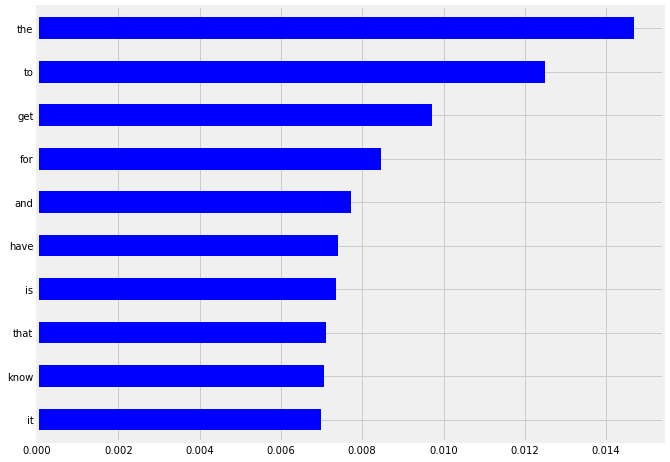

In [71]:
# Plot the feature importance
feat_scores = pd.Series(rf.feature_importances_, index=vectorizer.get_feature_names())
feat_scores = feat_scores.sort_values()
ax = feat_scores[-10:].plot(kind='barh', 
                      figsize=(10,8),
                      color='b')

In [48]:
feat_scores = pd.Series(rf.feature_importances_, index=X.columns)
ax = feat_scores.plot(kind='barh',figsize=(10,8))

AttributeError: columns not found

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [59]:
cf = pd.crosstab(y_test,rf.predict(X_test))
print(cf)

col_0      False  True 
low_score              
False        110      0
True           6    111


In [54]:
plot_confusion_matrix(rf,cf.values, cf.index.values, cf.T.index.values)

ValueError: plot_confusion_matrix only supports classifiers